# American Sign Language (ASL) Image Recognition using Deep Learning

## Overview

This Jupyter Notebook was created as part of our capstone project for the Master's in Data Science at Drexel University.  The capstone spans two courses.  This portion is for DSCI 591: Capstone I, which contains the data acquisition, pre-processing, and EDA portions of a data science workflow.

The goal of this project was to use deep learning to accuracy identify the different hand signs of the ASL alphabet.  We created our own dataset by taking 30 second videos of each hand sign and splitting the video into individual frames.  The images were then cropped, converted to grayscale, and then converted to `.csv` files.  These steps were accomplished using the respective Python scripts on our [Github](https://github.com/zachcarlson/ASLImageRecognition) page.

A recorded presentation of our pre-processing pipeline is available [here](https://drive.google.com/file/d/1VBGQmtTYzJHX6AOYr2WLUZMfGGAYYMrW/view?usp=sharing).

This notebook currently serves as a showcase for some of the pre-processing and EDA we have done, rather than the main report for our project.  

## Load Functions/Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
def rename_columns(df, num_cols=50177):
    '''
    Returns a DF with renamed columns (replaces 0, 1, 2 with label, pixel1, pixel2, etc.)
    '''
    col_names = ["pixel"+str(i) for i in range(num_cols)]
    col_names[0] = "label"
    df.columns = col_names
    return df

In [3]:
def convert_to_image(df, image_num=1):
    '''
    Reshapes one image within a DF to the original image format for visualization.
    '''
    image = df.iloc[image_num, :]
    image = image.to_numpy().reshape(224, 224)
    return image

In [4]:
def get_mean_values(df):
    '''
    Returns a 1-D NumPy array of average values for each pixel within a given class or DataFrame.
    '''
    return df.mean(axis=0, numeric_only=True).to_numpy()

In [5]:
def plot_mean_image(df):
    '''
    Plots the mean image for a given class in grayscale
    '''
    feature_means = get_mean_values(df)
    feature_means_image = feature_means.reshape(224, 224)
    plt.imshow(feature_means_image)
    plt.gray()

In [6]:
def CSV_To_DF(path):
    print("Reading CSV in directory:", path)
    if not os.path.exists(path):
        print('No directory found.')
        return None
    files = os.listdir(path)
    if len(files) > 1:
        print('This script expects only one file per class directory. More than one file was detected. ')
        return None
    return pd.read_csv(path+files[0], header=None)

## Import Data

We'll load in the pre-processed images stored in `.csv` files:

In [7]:
letter_A = pd.read_csv('D:/Masters_Classes/Capstone/ASLImageRecognition/CSV_Files/letter_A/A_img_pixels.csv', header=None)
letter_A.head()

,0,1,2,3,4,5,6,7,8,9,...,50167,50168,50169,50170,50171,50172,50173,50174,50175,50176
0,A,135,135,135,134,134,134,134,135,135,...,139,139,139,138,137,138,138,139,138,138
1,A,135,135,135,134,134,134,134,135,135,...,139,139,139,139,139,139,139,138,138,138
2,A,134,135,134,135,135,134,135,135,136,...,141,141,141,141,141,141,139,139,139,139
3,A,135,135,136,135,136,136,136,136,136,...,140,139,141,138,138,139,139,140,139,139
4,A,135,135,136,136,136,136,136,136,136,...,139,139,140,139,139,138,140,140,139,140


## Preprocessing

First we'll remove the `label` column:

In [8]:
# letter_A = rename_columns(letter_A)
# letter_A = letter_A.iloc[:, 1:]
# letter_A.head()

Next, we'll plot the first image in this class to verify its contents:

In [9]:
# image_1 = convert_to_image(df=letter_A)
# plt.imshow(image_1)
# plt.gray()

## EDA

The first goal in our EDA will be to look at average pixel values within and across classes.  First, we'll look at average pixel values within a given class:

In [10]:
#feature_means = plot_mean_image(letter_A)

Now we'll look at average pixel values across classes.  We'll be using the mean images created in the previous step to compare pixel values across classes.  Each mean image will be stored in `letter_means` and then analyzed further:

In [11]:
import os

#go to CSV files
inpath = 'D:\\Masters_Classes\\Capstone\\ASLImageRecognition\\CSV_Files\\'
os.chdir(inpath)

#make empty Dataframe
letter_means_csv = pd.DataFrame(columns = range(1, 50177, 1))

#iterate over each letter
for d in os.listdir():
    df = CSV_To_DF(inpath+d+'/')
    if df is None:
        print("No DF found")
    feature_means = df.mean(axis=0,numeric_only=True).to_frame().T
    letter_means_csv = pd.concat([letter_means_csv, feature_means])

Reading CSV in directory: D:\Masters_Classes\Capstone\ASLImageRecognition\CSV_Files\letter_A/
Reading CSV in directory: D:\Masters_Classes\Capstone\ASLImageRecognition\CSV_Files\letter_B/
Reading CSV in directory: D:\Masters_Classes\Capstone\ASLImageRecognition\CSV_Files\letter_C/
Reading CSV in directory: D:\Masters_Classes\Capstone\ASLImageRecognition\CSV_Files\letter_D/
Reading CSV in directory: D:\Masters_Classes\Capstone\ASLImageRecognition\CSV_Files\letter_E/
Reading CSV in directory: D:\Masters_Classes\Capstone\ASLImageRecognition\CSV_Files\letter_F/
Reading CSV in directory: D:\Masters_Classes\Capstone\ASLImageRecognition\CSV_Files\letter_G/
Reading CSV in directory: D:\Masters_Classes\Capstone\ASLImageRecognition\CSV_Files\letter_H/
Reading CSV in directory: D:\Masters_Classes\Capstone\ASLImageRecognition\CSV_Files\letter_I/
Reading CSV in directory: D:\Masters_Classes\Capstone\ASLImageRecognition\CSV_Files\letter_K/
Reading CSV in directory: D:\Masters_Classes\Capstone\ASLIma

Now that the data has been read in and saved, let's look at the dataframe:

In [12]:
letter_means_csv

,1,2,3,4,5,6,7,8,9,10,...,50167,50168,50169,50170,50171,50172,50173,50174,50175,50176
0,130.512903,130.604301,130.841935,130.959140,131.049462,131.255914,131.394624,131.580645,131.737634,131.813978,...,137.276344,137.141935,137.059140,136.948387,136.852688,136.812903,136.687097,136.605376,136.500000,136.458065
0,138.077681,138.119256,138.268053,138.433260,138.530635,138.669584,138.814004,138.928884,139.061269,139.202407,...,150.530635,150.494530,150.411379,150.376368,150.364333,150.281182,150.234136,150.221007,150.273523,150.203501
0,136.782653,136.932653,137.128571,137.291837,137.423469,137.679592,137.834694,137.986735,138.189796,138.306122,...,132.111224,132.844898,133.905102,134.666327,135.388776,136.482653,137.431633,138.002041,138.386735,138.578571
0,136.269926,136.380446,136.596174,136.775770,136.908608,137.063762,137.223167,137.414453,137.596174,137.699256,...,147.162593,147.566419,148.451647,149.051010,149.270988,149.342189,149.530287,149.848034,150.076514,150.344315
0,141.818278,141.871413,142.072264,142.202976,142.327311,142.483528,142.541977,142.683316,142.822529,142.902232,...,149.852285,149.811902,149.766206,149.712009,149.634431,149.577046,149.498406,149.473964,149.426142,149.328374
0,137.942469,138.034519,138.223849,138.291841,138.374477,138.556485,138.552301,138.707113,138.860879,138.900628,...,148.982218,148.982218,148.904812,148.810669,148.835774,148.792887,148.797071,148.861925,148.965481,149.012552
0,135.456197,135.611111,135.866453,136.065171,136.287393,136.538462,136.721154,136.934829,137.141026,137.257479,...,123.227564,123.864316,124.566239,125.342949,125.989316,126.680556,127.355769,128.091880,128.704060,129.279915
0,142.680736,142.882035,143.103896,143.259740,143.468615,143.660173,143.762987,143.998918,144.251082,144.363636,...,152.884199,152.897186,152.893939,152.945887,152.971861,153.090909,153.279221,153.459957,153.551948,153.686147
0,130.836383,130.942949,131.121636,131.279871,131.440258,131.666308,131.833154,131.974166,132.171152,132.270183,...,143.789020,143.741658,143.668461,143.600646,143.543595,143.526372,143.504844,143.438105,143.337998,143.280947
0,131.585313,131.681425,131.852052,131.989201,132.091793,132.236501,132.350972,132.550756,132.668467,132.779698,...,139.713823,139.731102,139.698704,139.707343,139.614471,139.572354,139.584233,139.555076,139.551836,139.454644


Finally, we'll edit the column names and export the file for easier analysis later:

In [13]:
letter_means_csv.columns = ["pixel"+str(i) for i in range(1, letter_means_csv.shape[1]+1, 1)]

In [14]:
letter_means_csv.to_csv("D:/Masters_Classes/Capstone/ASLImageRecognition/letter_means_df.csv")

In [15]:
test = pd.read_csv("D:/Masters_Classes/Capstone/ASLImageRecognition/letter_means_df.csv")
test.head()

,Unnamed: 0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel50167,pixel50168,pixel50169,pixel50170,pixel50171,pixel50172,pixel50173,pixel50174,pixel50175,pixel50176
0,0,130.512903,130.604301,130.841935,130.959140,131.049462,131.255914,131.394624,131.580645,131.737634,...,137.276344,137.141935,137.059140,136.948387,136.852688,136.812903,136.687097,136.605376,136.500000,136.458065
1,0,138.077681,138.119256,138.268053,138.433260,138.530635,138.669584,138.814004,138.928884,139.061269,...,150.530635,150.494530,150.411379,150.376368,150.364333,150.281182,150.234136,150.221007,150.273523,150.203501
2,0,136.782653,136.932653,137.128571,137.291837,137.423469,137.679592,137.834694,137.986735,138.189796,...,132.111224,132.844898,133.905102,134.666327,135.388776,136.482653,137.431633,138.002041,138.386735,138.578571
3,0,136.269926,136.380446,136.596174,136.775770,136.908608,137.063762,137.223167,137.414453,137.596174,...,147.162593,147.566419,148.451647,149.051010,149.270988,149.342189,149.530287,149.848034,150.076514,150.344315
4,0,141.818278,141.871413,142.072264,142.202976,142.327311,142.483528,142.541977,142.683316,142.822529,...,149.852285,149.811902,149.766206,149.712009,149.634431,149.577046,149.498406,149.473964,149.426142,149.328374


We'll now calculate the standard deviation for a given pixel across all classes using only the mean images we calculated earlier:

In [16]:
image_mean_values = test.iloc[:,1:]
labels = test.iloc[:,:1]

image_mean_values_std = image_mean_values.std().to_frame()
image_mean_values_std.columns = ["std"]
image_mean_values_std.head()

,std
pixel1,5.084913
pixel2,5.073516
pixel3,5.051833
pixel4,5.028072
pixel5,5.023213


Before visualizing the standard deviations, we'll convert the df back to a numpy array, reshape it to the original image format:

In [17]:
image_mean_values = image_mean_values_std.to_numpy()
image_mean_values

array([[5.08491332],
       [5.07351598],
       [5.05183282],
       ...,
       [7.70152581],
       [7.60224188],
       [7.54624536]])

In [18]:
image_mean_values = image_mean_values.reshape(224, 224)

Lastly, we'll invert the grayscale image.  After inverting, **the darker colors show higher standard deviation, as opposed to the lighter colors**.  It will be easier to identify the most variable regions this way:

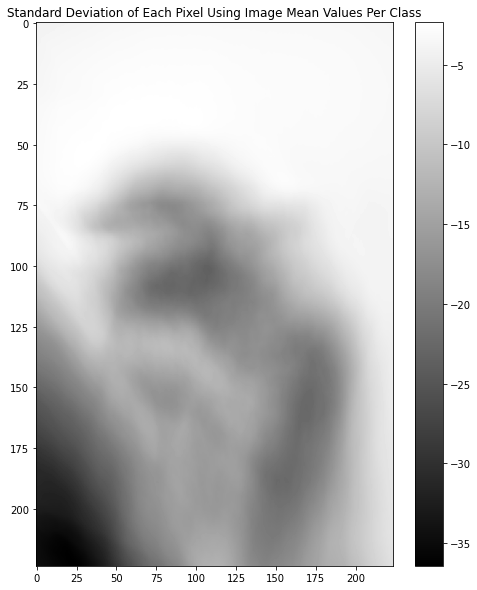

In [19]:
plt.imshow(1 - image_mean_values, aspect="auto") #invert black and white
plt.colorbar()
plt.title("Standard Deviation of Each Pixel Using Image Mean Values Per Class")
plt.gcf().set_size_inches(8, 10)
plt.gray()